In [ ]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [ ]:
# Carregando a base de dados

path = kagglehub.dataset_download("ankushpanday1/leukemia-cancer-risk-prediction-dataset")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/ankushpanday1/leukemia-cancer-risk-prediction-dataset/versions/1


['biased_leukemia_dataset.csv']

In [ ]:
path = '/root/.cache/kagglehub/datasets/ankushpanday1/leukemia-cancer-risk-prediction-dataset/versions/1'
df = pd.read_csv(path + '/biased_leukemia_dataset.csv')

## Propriedades dos dados:

In [ ]:
# Verificando as linhas iniciais do dataset
df.head()

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,...,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,...,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,...,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,...,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,...,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,...,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143194 entries, 0 to 143193
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Patient_ID            143194 non-null  int64  
 1   Age                   143194 non-null  int64  
 2   Gender                143194 non-null  object 
 3   Country               143194 non-null  object 
 4   WBC_Count             143194 non-null  int64  
 5   RBC_Count             143194 non-null  float64
 6   Platelet_Count        143194 non-null  int64  
 7   Hemoglobin_Level      143194 non-null  float64
 8   Bone_Marrow_Blasts    143194 non-null  int64  
 9   Genetic_Mutation      143194 non-null  object 
 10  Family_History        143194 non-null  object 
 11  Smoking_Status        143194 non-null  object 
 12  Alcohol_Consumption   143194 non-null  object 
 13  Radiation_Exposure    143194 non-null  object 
 14  Infection_History     143194 non-null  object 
 15  

# ---------------------------------------------------------------------------------------------------------------

# Pessoas com e sem leucemia:

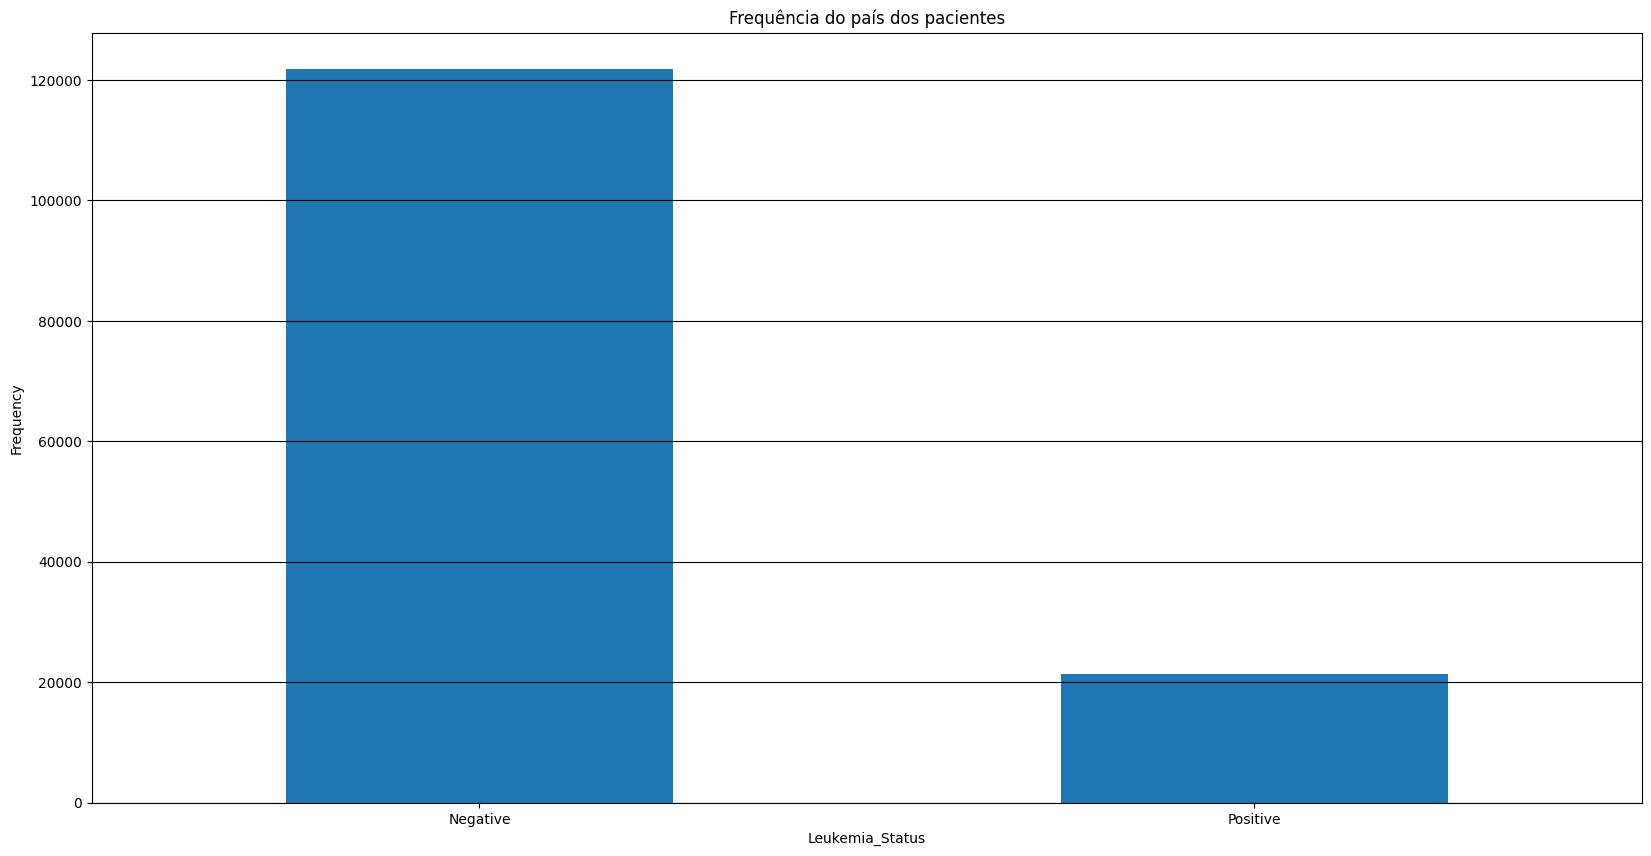

In [ ]:
# Gráfico com a quantidade de pessoas com leucemia
plt.figure(figsize=(20, 10))
plt.title("Frequência do dos pacientes")
plt.xlabel("Leukemia_Status")
plt.ylabel("Frequency")
df['Leukemia_Status'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
qtd_pais = df['Leukemia_Status'].value_counts().reset_index(name='Frequency')
qtd_pais.columns = ['Leukemia_Status', 'Frequency']
qtd_pais

,Leukemia_Status,Frequency
0,Negative,121797
1,Positive,21397


# Divididos por idade:

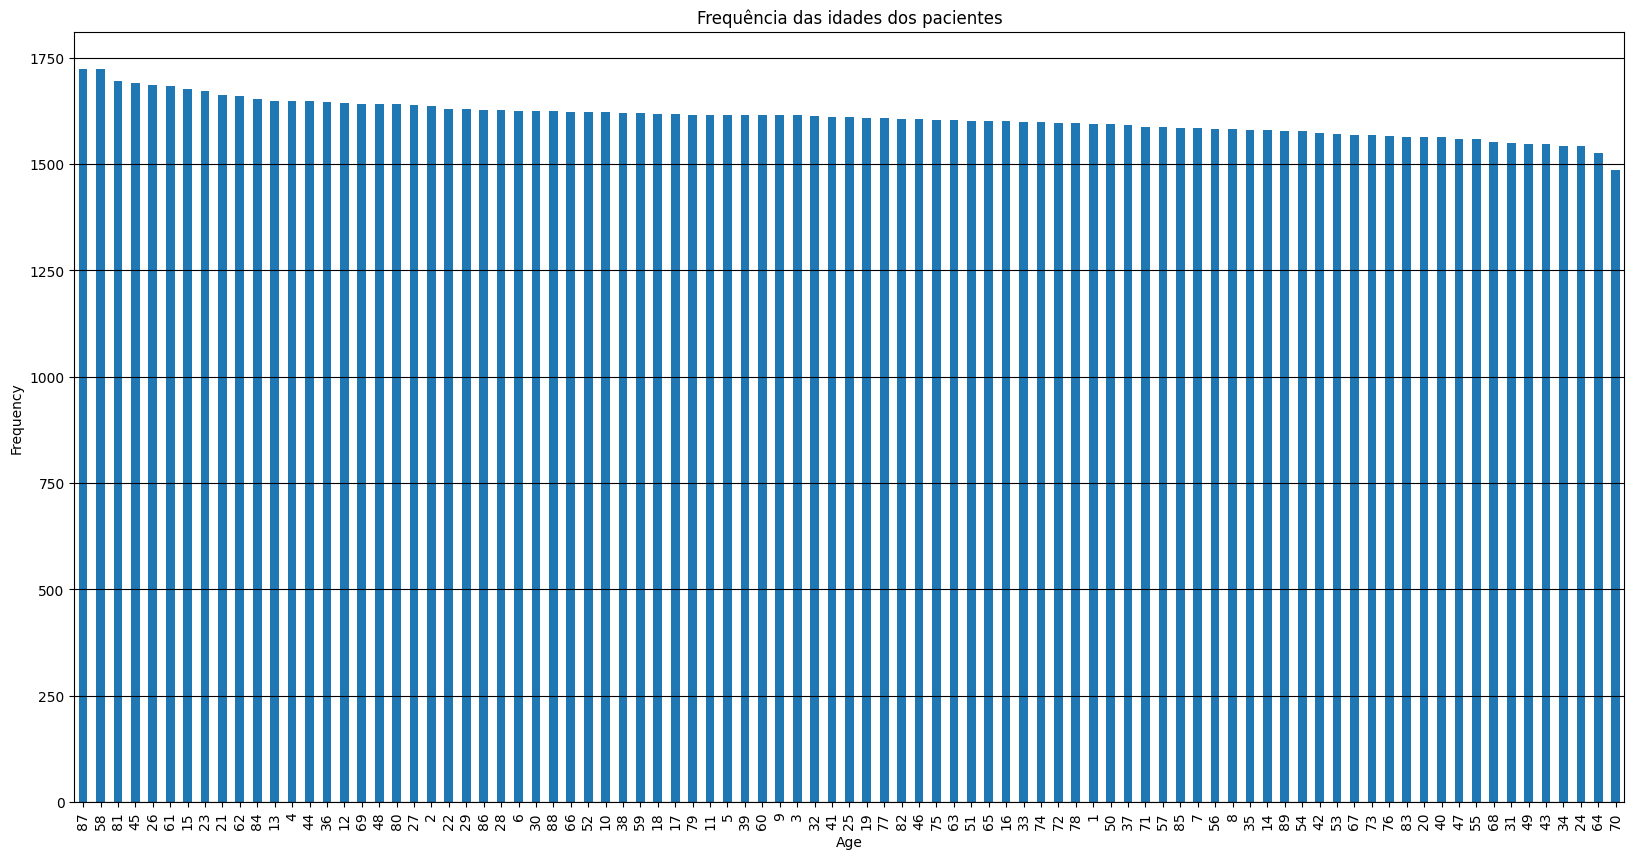

In [ ]:
# Gráfico com as idades
plt.figure(figsize=(20, 10))
plt.title("Frequência das idades dos pacientes")
plt.xlabel("Age")
plt.ylabel("Frequency")
df['Age'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=90)
plt.show()

In [ ]:
qtd_idade = df['Age'].value_counts().reset_index(name='Frequency')
qtd_idade.columns = ['Age', 'Frequency']
qtd_idade

,Age,Frequency
0,87,1724
1,58,1722
2,81,1694
3,45,1690
4,26,1686
...,...,...
84,43,1546
85,34,1541
86,24,1541
87,64,1525


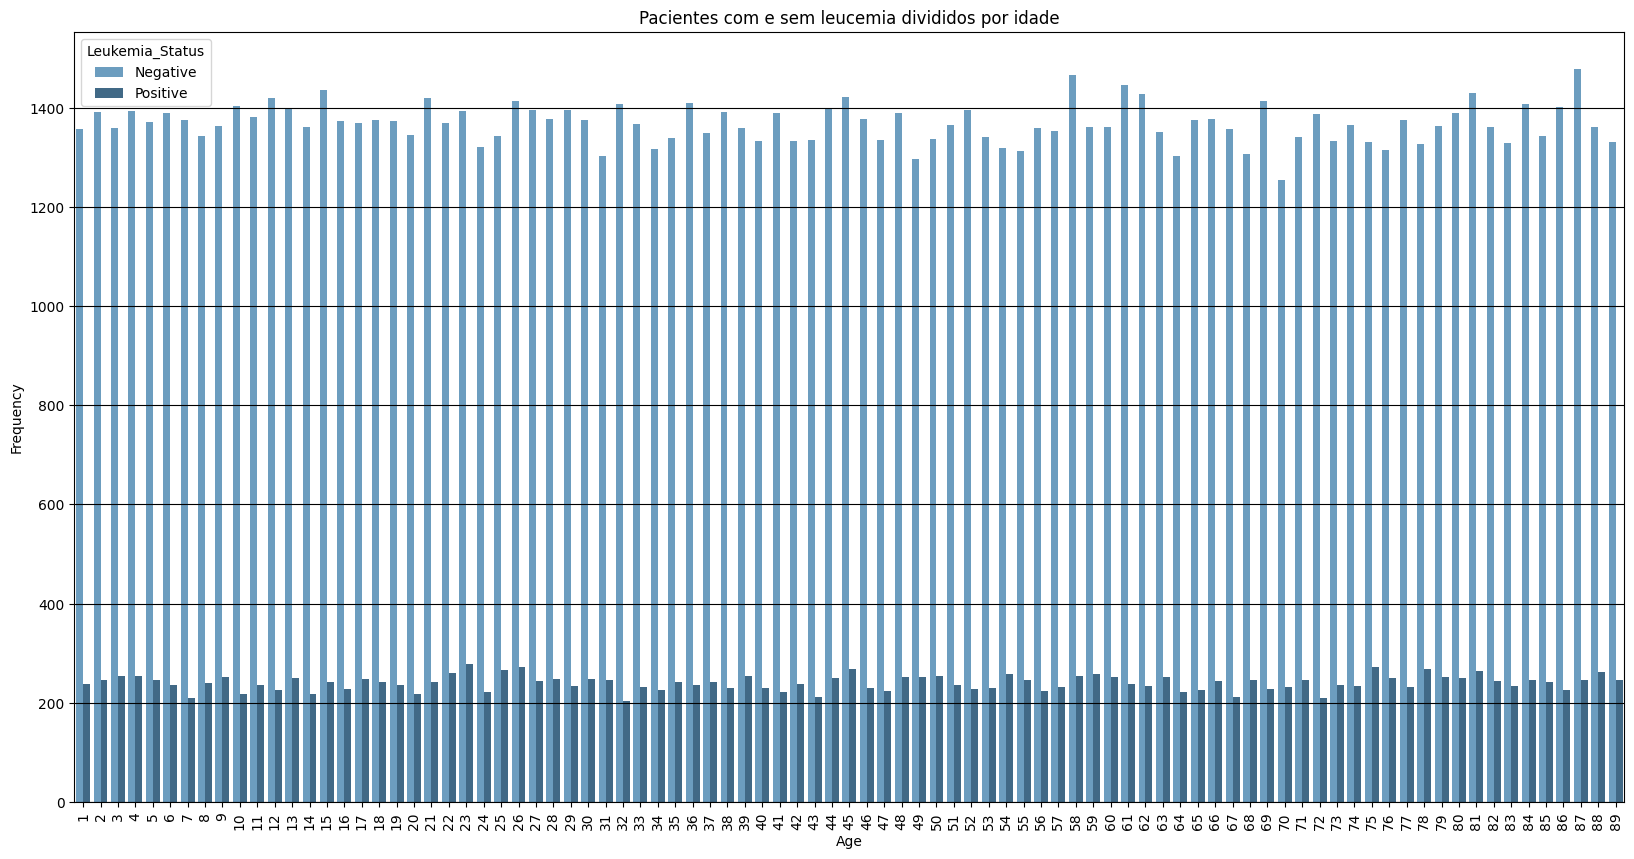

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Age', hue='Leukemia_Status', data=df, palette='Blues_d')
plt.title('Pacientes com e sem leucemia divididos por idade')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=90)
plt.show()

In [ ]:
contagem = df.groupby(['Age', 'Leukemia_Status']).size().reset_index(name='Frequency')
contagem

,Age,Leukemia_Status,Frequency
0,1,Negative,1357
1,1,Positive,238
2,2,Negative,1391
3,2,Positive,246
4,3,Negative,1360
...,...,...,...
173,87,Positive,245
174,88,Negative,1361
175,88,Positive,263
176,89,Negative,1332


# Divididos por genero:

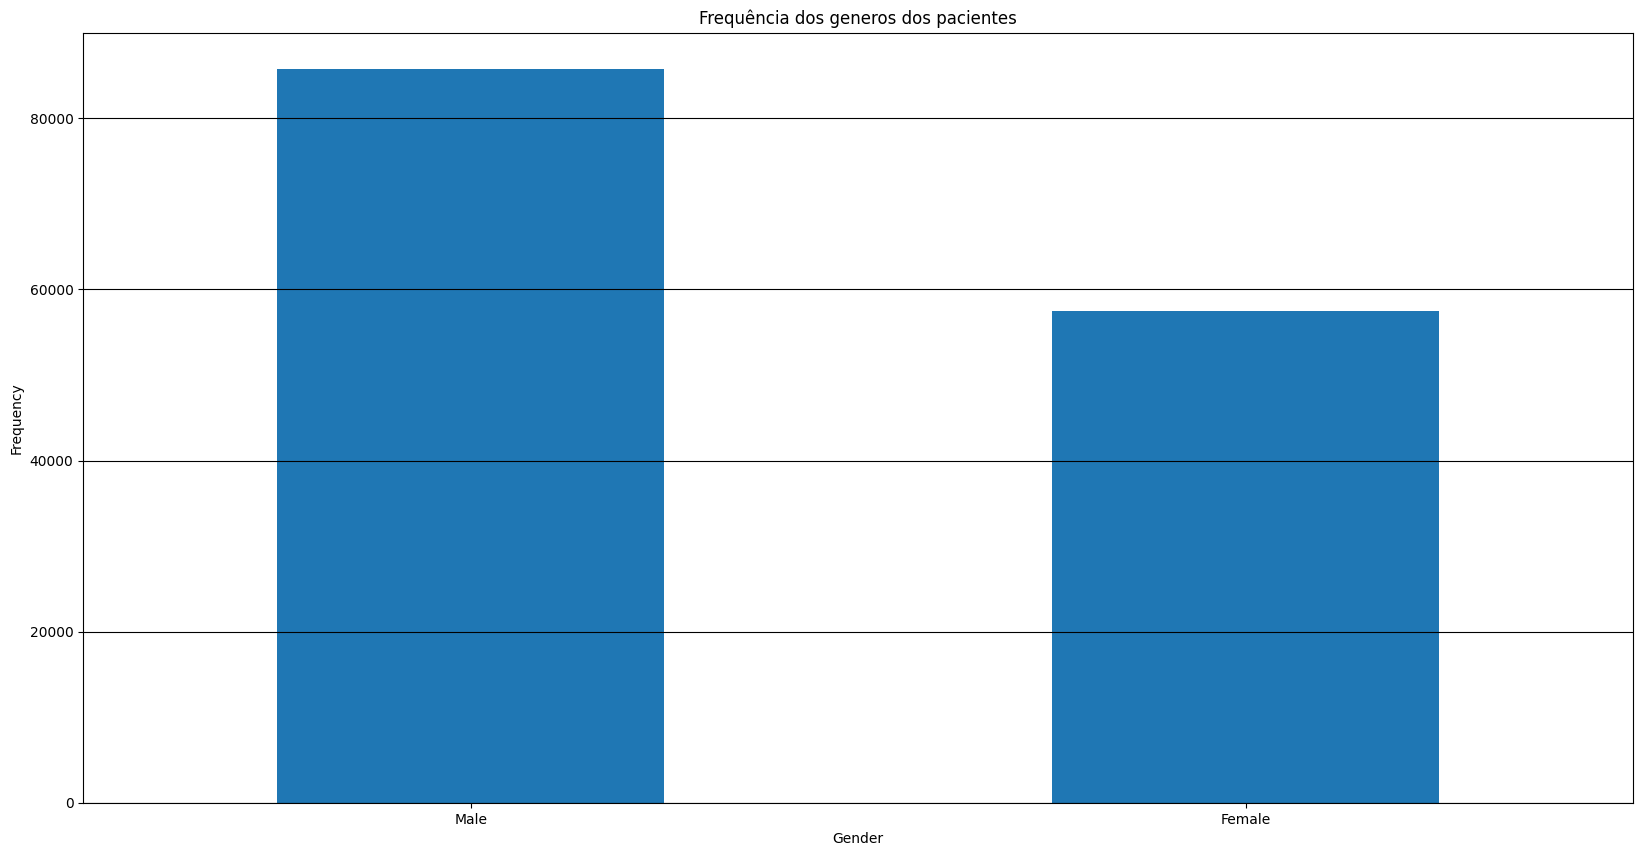

In [ ]:
# Gráfico com os gêneros dentre os entrevistados
plt.figure(figsize=(20, 10))
plt.title("Frequência dos generos dos pacientes")
plt.xlabel("Gender")
plt.ylabel("Frequency")
df['Gender'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
qtd_genero = df['Gender'].value_counts().reset_index(name='Frequency')
qtd_genero.columns = ['Gender', 'Frequency']
qtd_genero

,Gender,Frequency
0,Male,85724
1,Female,57470


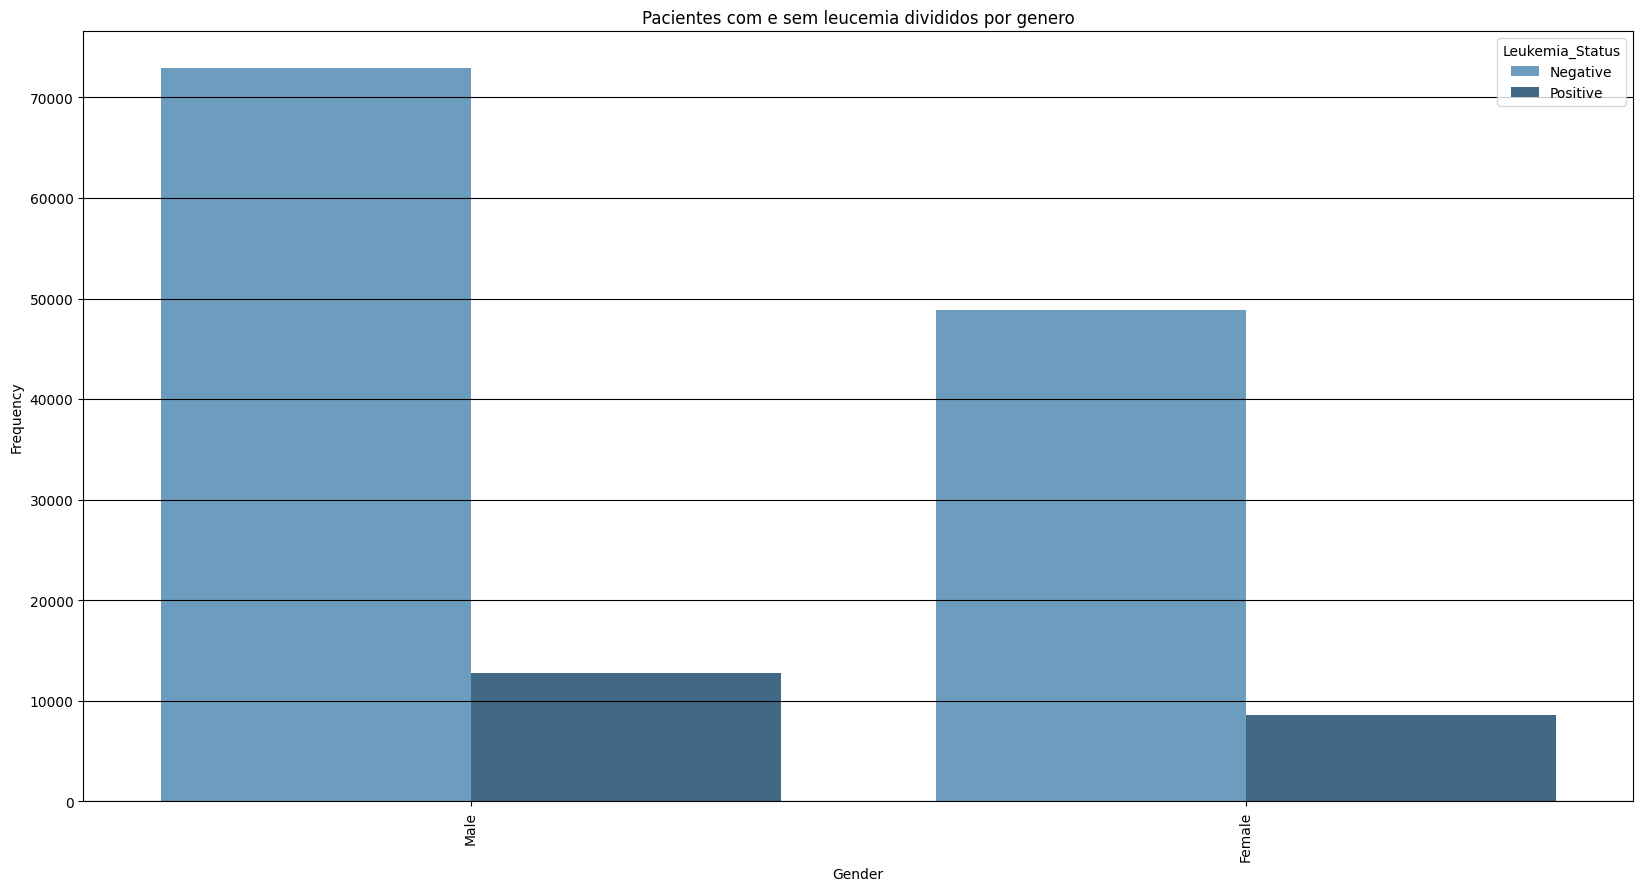

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Gender', hue='Leukemia_Status', data=df, palette='Blues_d')
plt.title('Pacientes com e sem leucemia divididos por genero')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=90)
plt.show()

In [ ]:
contagem = df.groupby(['Gender', 'Leukemia_Status']).size().reset_index(name='Frequency')
contagem

,Gender,Leukemia_Status,Frequency
0,Female,Negative,48891
1,Female,Positive,8579
2,Male,Negative,72906
3,Male,Positive,12818


# Divididos por paises:



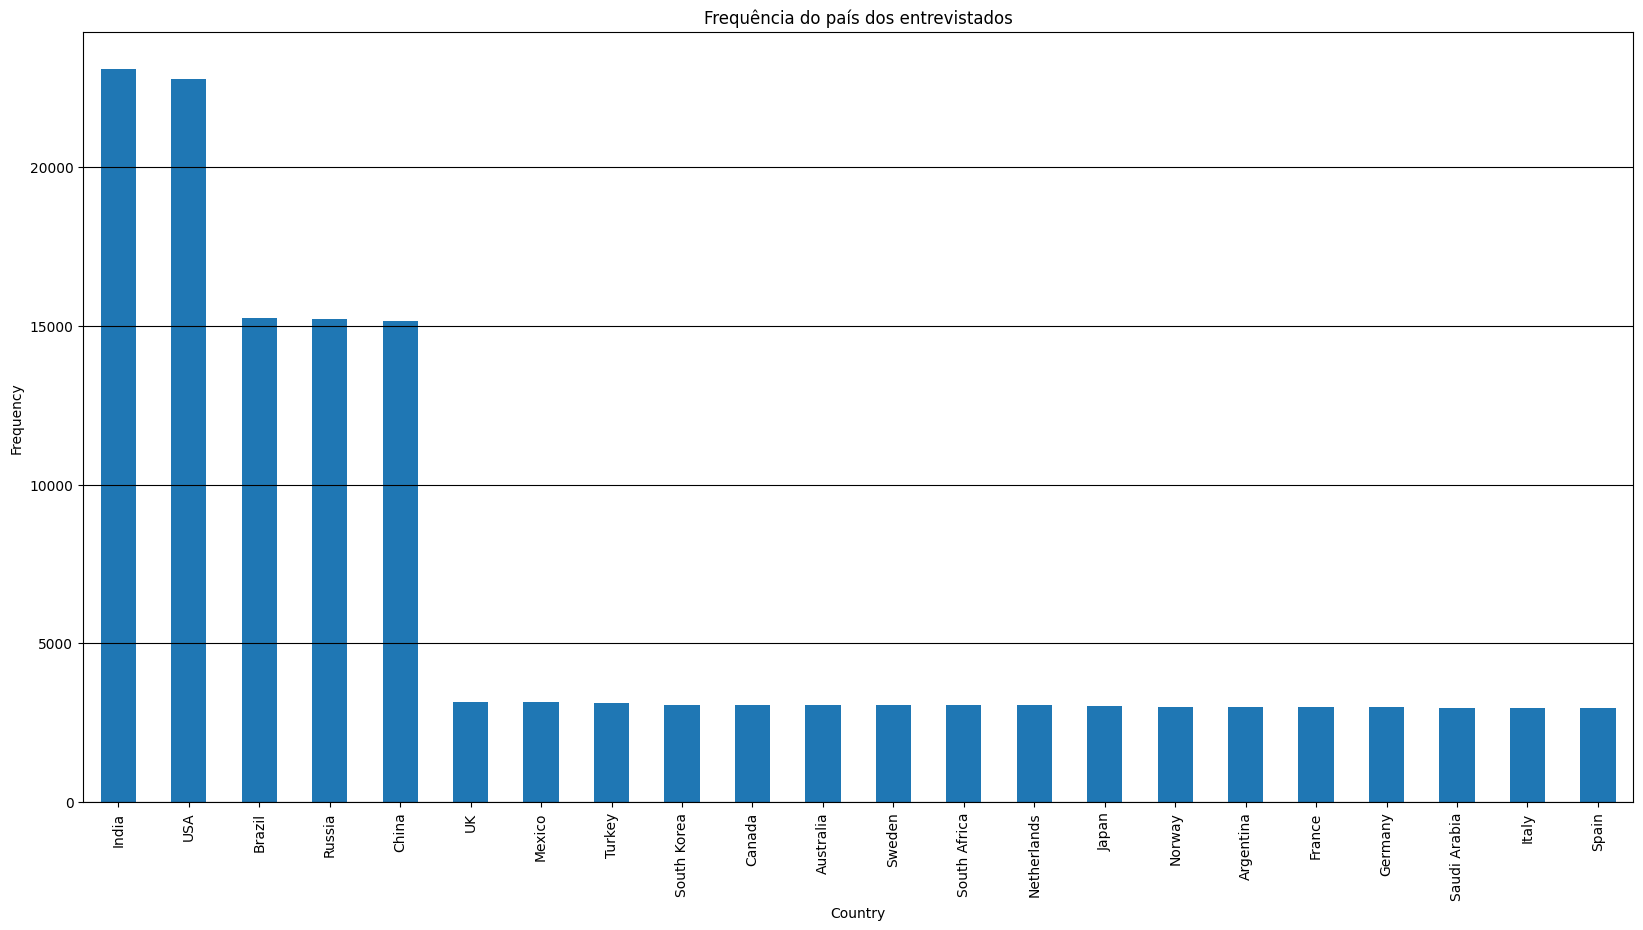

In [ ]:
# Gráfico com os paises entre os entrevistados
plt.figure(figsize=(20, 10))
plt.title("Frequência do país dos entrevistados")
plt.xlabel("Country")
plt.ylabel("Frequency")
df['Country'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=90)
plt.show()

In [ ]:
qtd_pais = df['Country'].value_counts().reset_index(name='Frequency')
qtd_pais.columns = ['Country', 'Frequency']
qtd_pais

,Country,Frequency
0,India,23083
1,USA,22777
2,Brazil,15232
3,Russia,15217
4,China,15147
5,UK,3165
6,Mexico,3160
7,Turkey,3126
8,South Korea,3072
9,Canada,3068


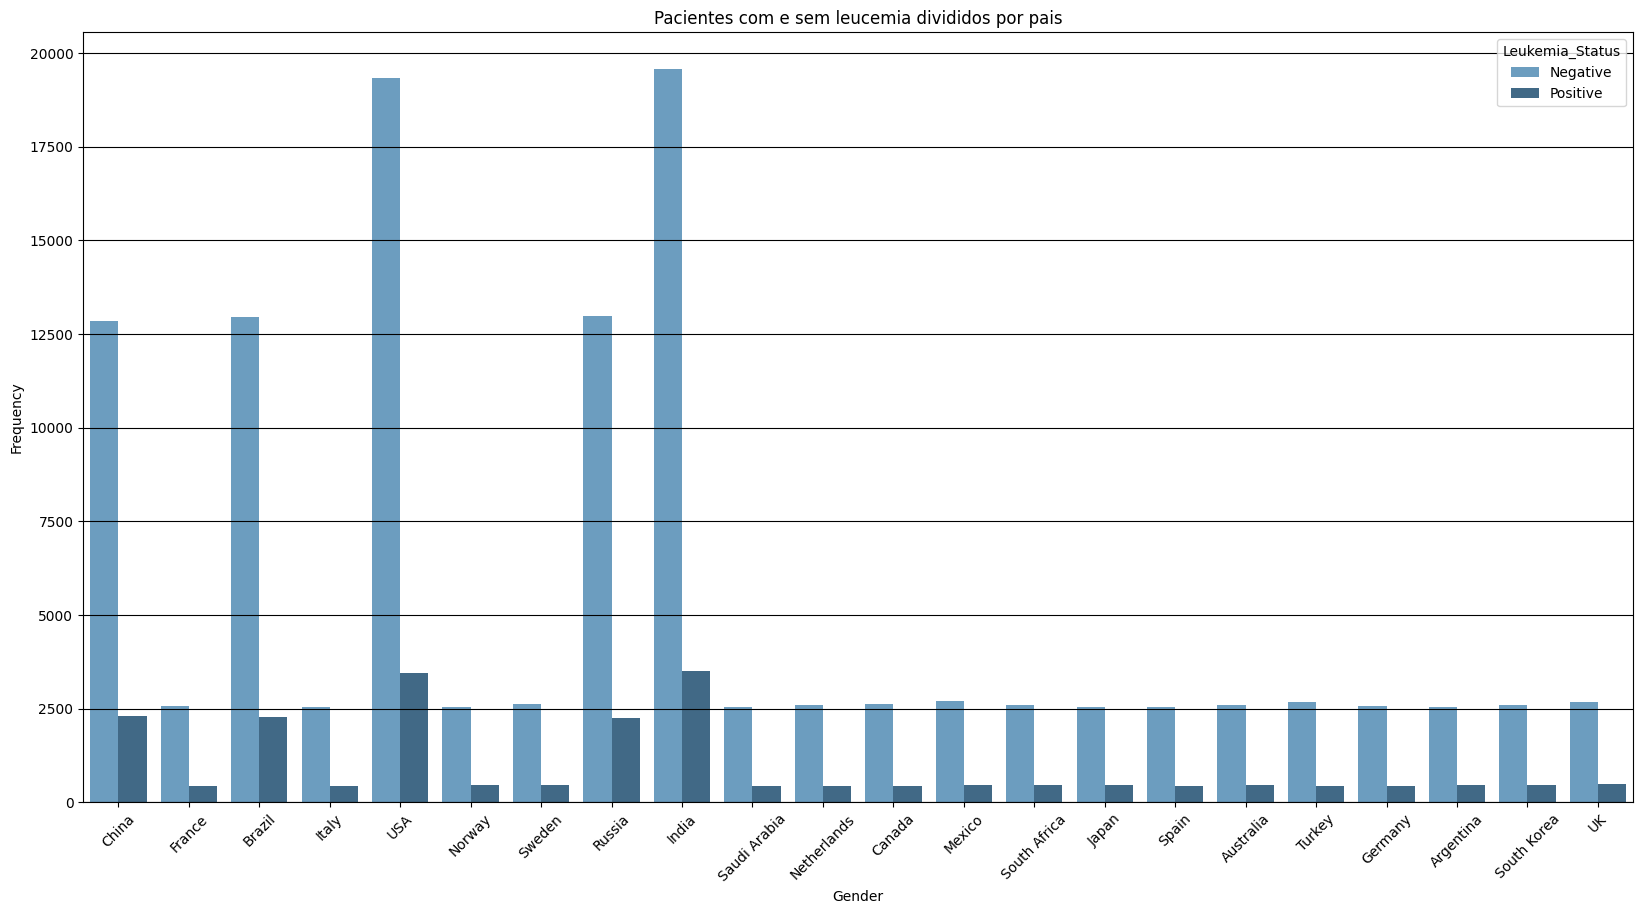

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Country', hue='Leukemia_Status', data=df, palette='Blues_d')
plt.title('Pacientes com e sem leucemia divididos por pais')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=45)
plt.show()

In [ ]:
contagem = df.groupby(['Country', 'Leukemia_Status']).size().reset_index(name='Frequency')
contagem

,Country,Leukemia_Status,Frequency
0,Argentina,Negative,2537
1,Argentina,Positive,464
2,Australia,Negative,2601
3,Australia,Positive,462
4,Brazil,Negative,12963
5,Brazil,Positive,2269
6,Canada,Negative,2634
7,Canada,Positive,434
8,China,Negative,12858
9,China,Positive,2289


# Divididos pelo consumo de alcool:

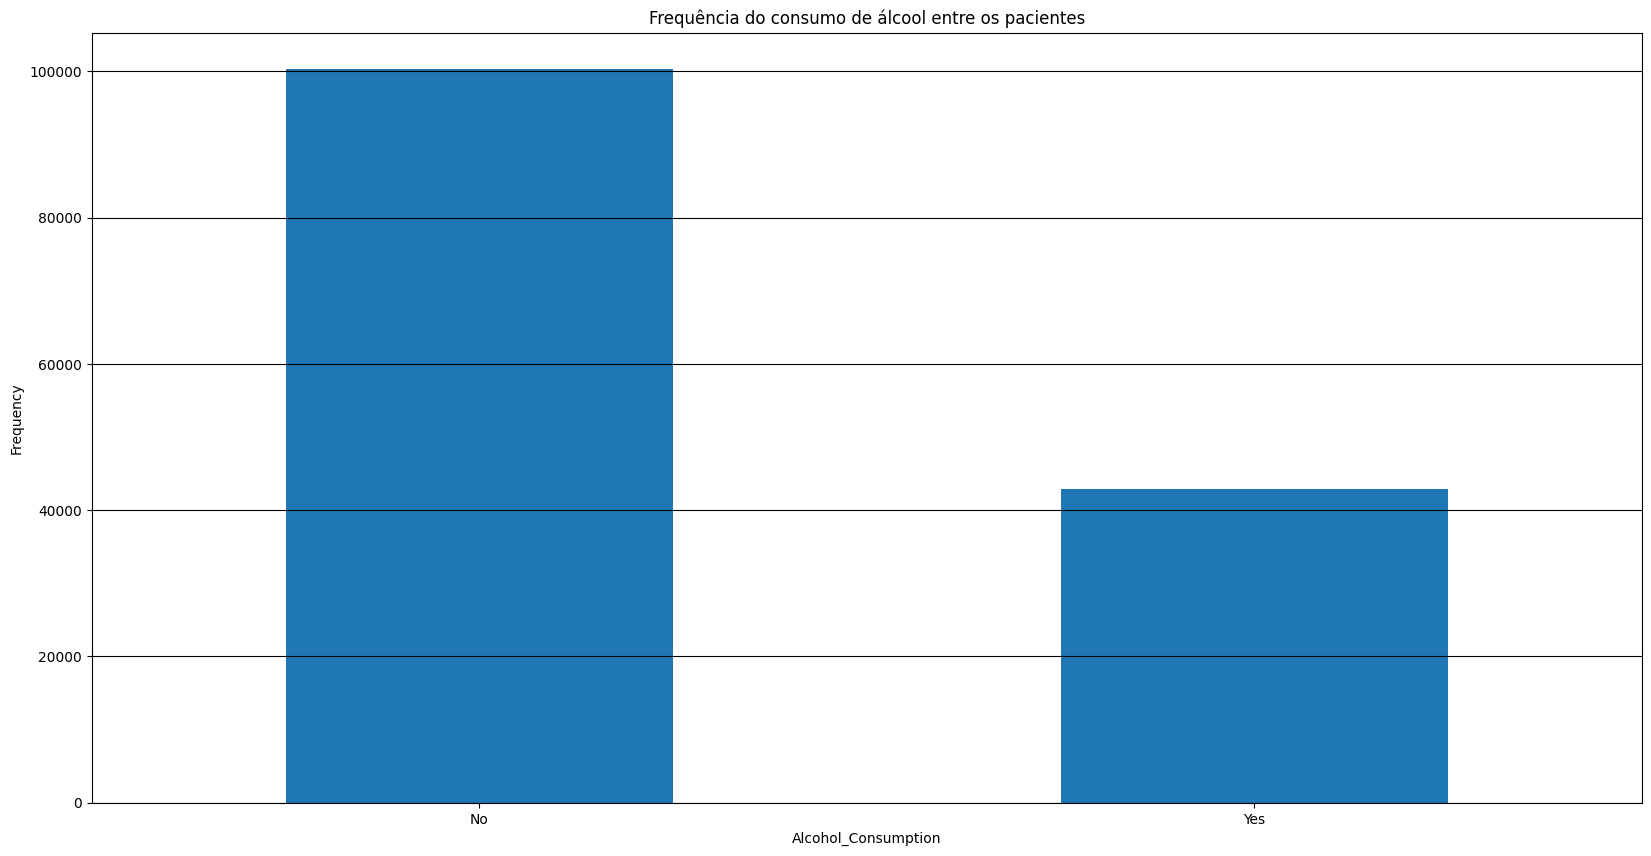

In [ ]:
# Gráfico com o consumo de álcool entre os entrevistados
plt.figure(figsize=(20, 10))
plt.title("Frequência do consumo de álcool entre os pacientes")
plt.xlabel("Alcohol_Consumption")
plt.ylabel("Frequency")
df['Alcohol_Consumption'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
qtd_alcool = df['Alcohol_Consumption'].value_counts().reset_index(name='Frequency')
qtd_alcool.columns = ['Alcohol_Consumption', 'Frequency']
qtd_alcool

,Alcohol_Consumption,Frequency
0,No,100293
1,Yes,42901


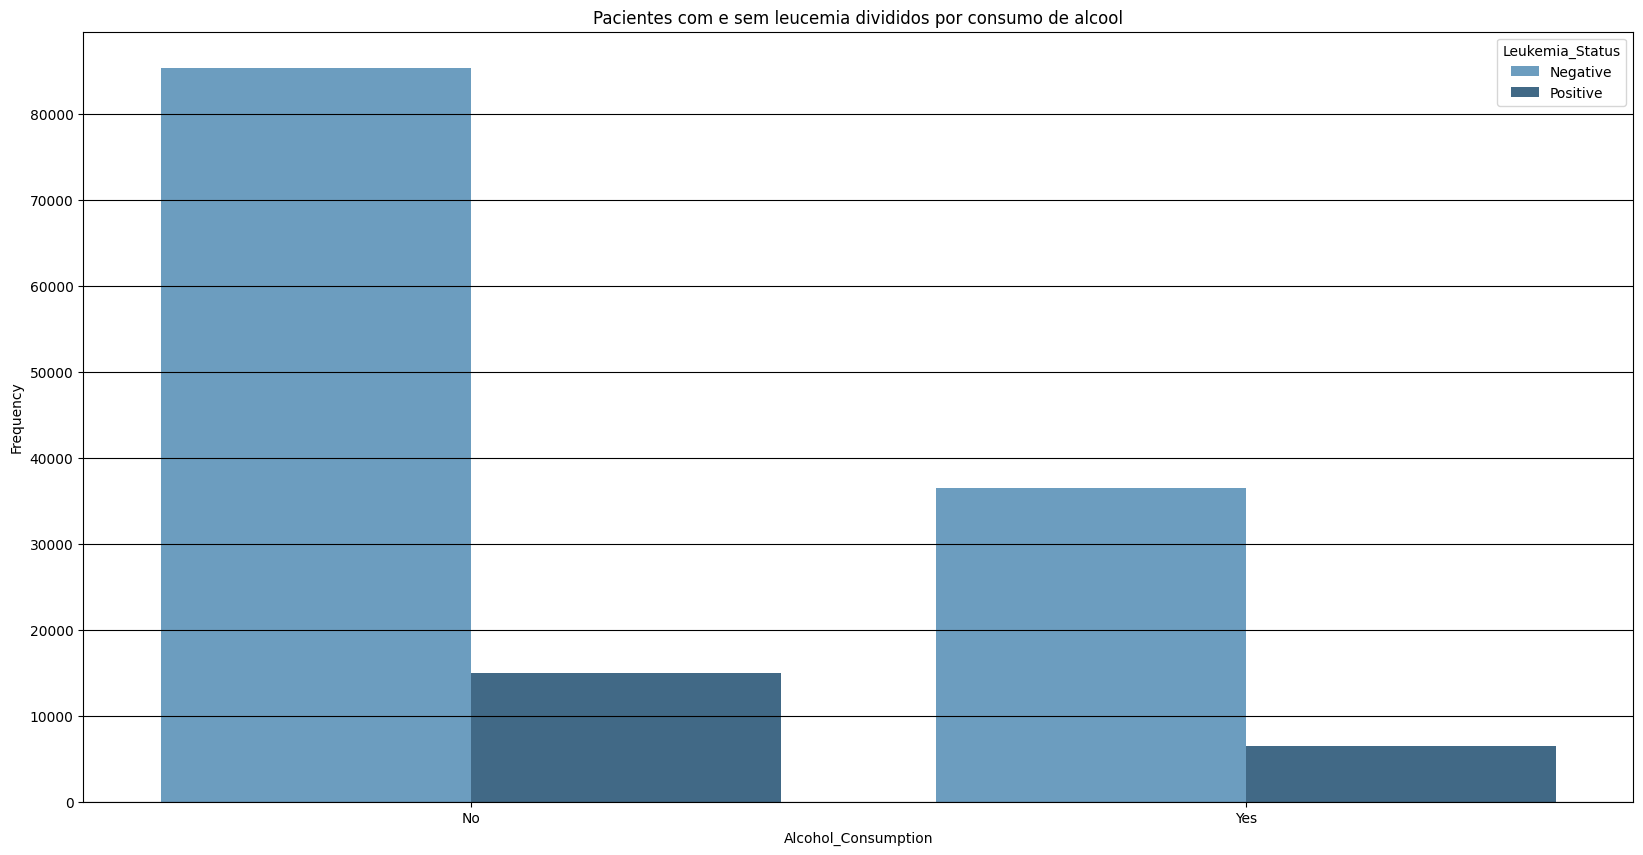

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Alcohol_Consumption', hue='Leukemia_Status', data=df, palette='Blues_d')
plt.title('Pacientes com e sem leucemia divididos por consumo de alcool')
plt.xlabel('Alcohol_Consumption')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
contagem = df.groupby(['Alcohol_Consumption', 'Leukemia_Status']).size().reset_index(name='Frequency')
contagem

,Alcohol_Consumption,Leukemia_Status,Frequency
0,No,Negative,85337
1,No,Positive,14956
2,Yes,Negative,36460
3,Yes,Positive,6441


# Divididos pelo status socioeconomico:

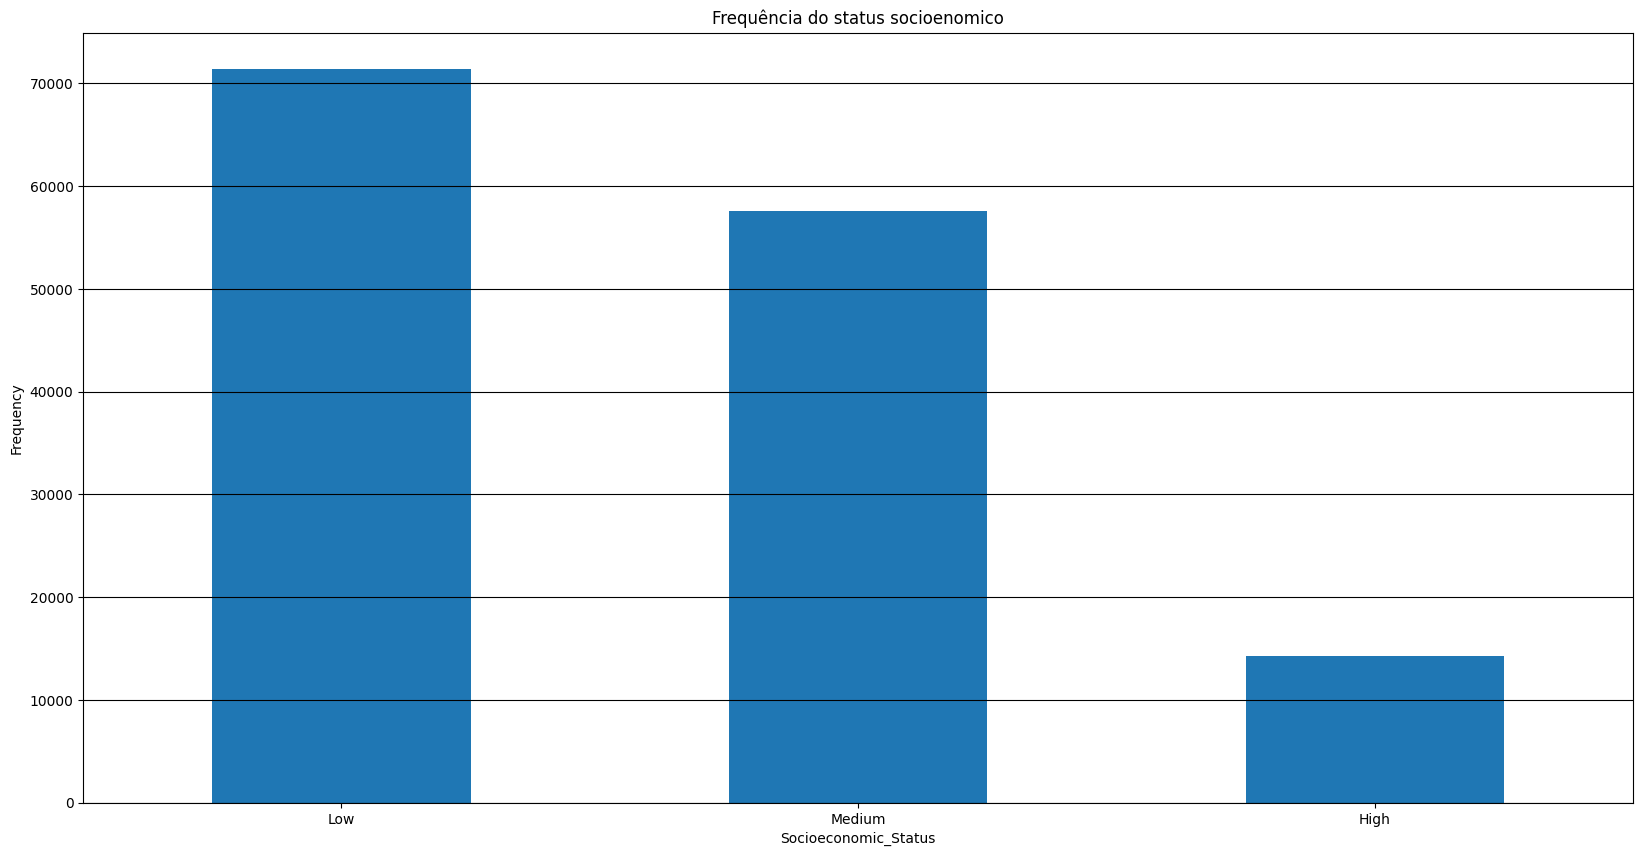

In [ ]:
# Gráfico socioeconomico entre os entrevistados
plt.figure(figsize=(20, 10))
plt.title("Frequência do status socioenomico")
plt.xlabel("Socioeconomic_Status")
plt.ylabel("Frequency")
df['Socioeconomic_Status'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
qtd_se = df['Socioeconomic_Status'].value_counts().reset_index(name='Frequency')
qtd_se.columns = ['Socioeconomic_Status', 'Frequency']
qtd_se

,Socioeconomic_Status,Frequency
0,Low,71361
1,Medium,57567
2,High,14266


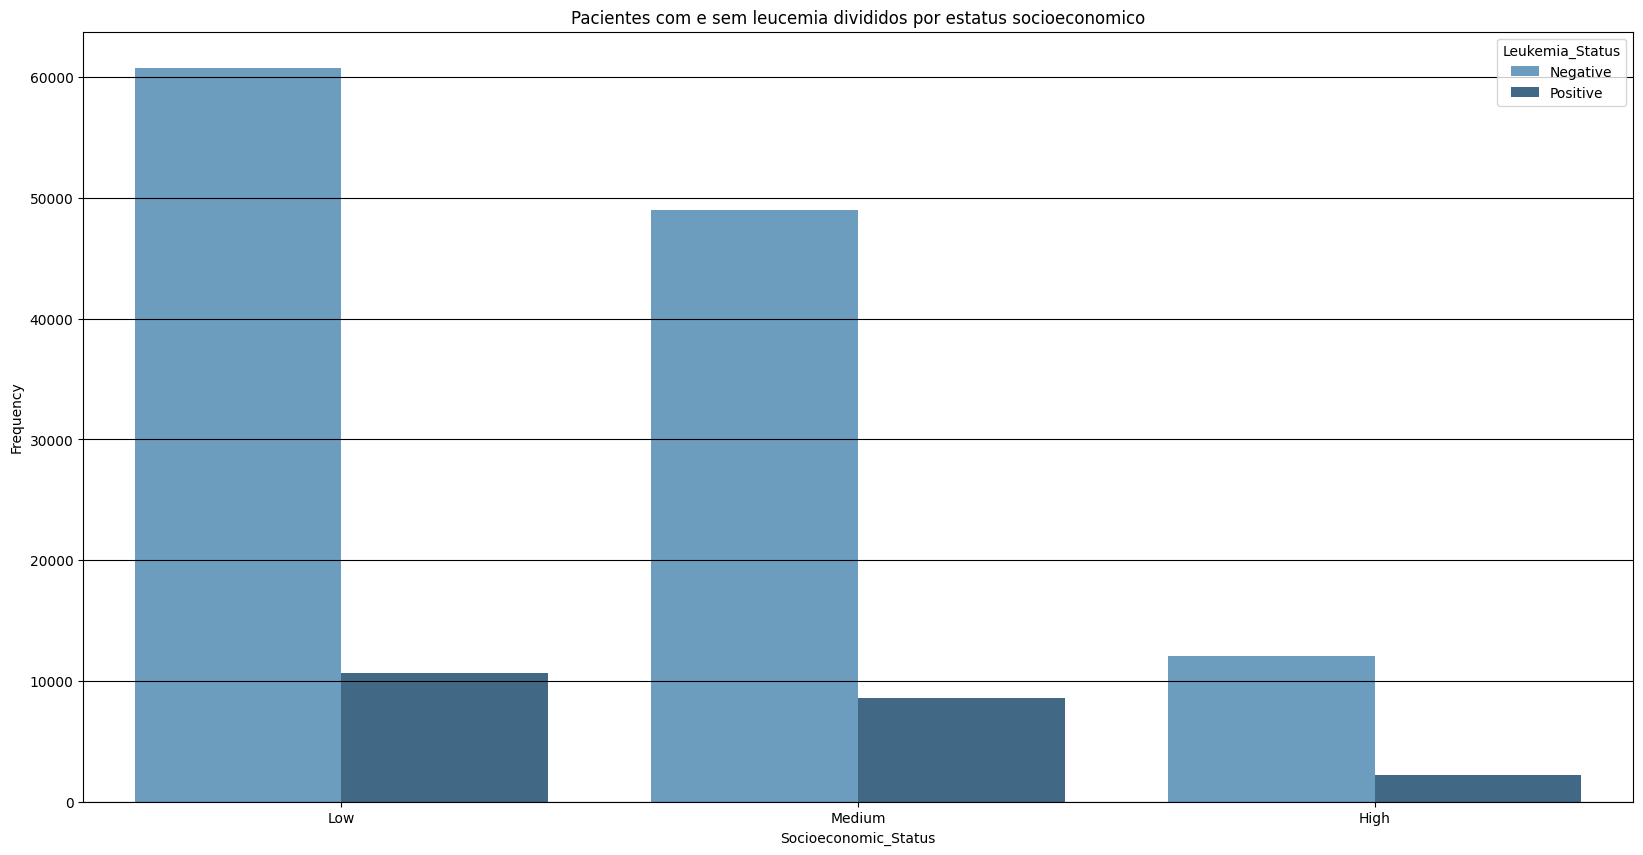

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Socioeconomic_Status', hue='Leukemia_Status', data=df, palette='Blues_d')
plt.title('Pacientes com e sem leucemia divididos por estatus socioeconomico')
plt.xlabel('Socioeconomic_Status')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
contagem = df.groupby(['Socioeconomic_Status', 'Leukemia_Status']).size().reset_index(name='Frequency')
contagem

,Socioeconomic_Status,Leukemia_Status,Frequency
0,High,Negative,12098
1,High,Positive,2168
2,Low,Negative,60740
3,Low,Positive,10621
4,Medium,Negative,48959
5,Medium,Positive,8608


# Divididos por região: Urbano vs Rural

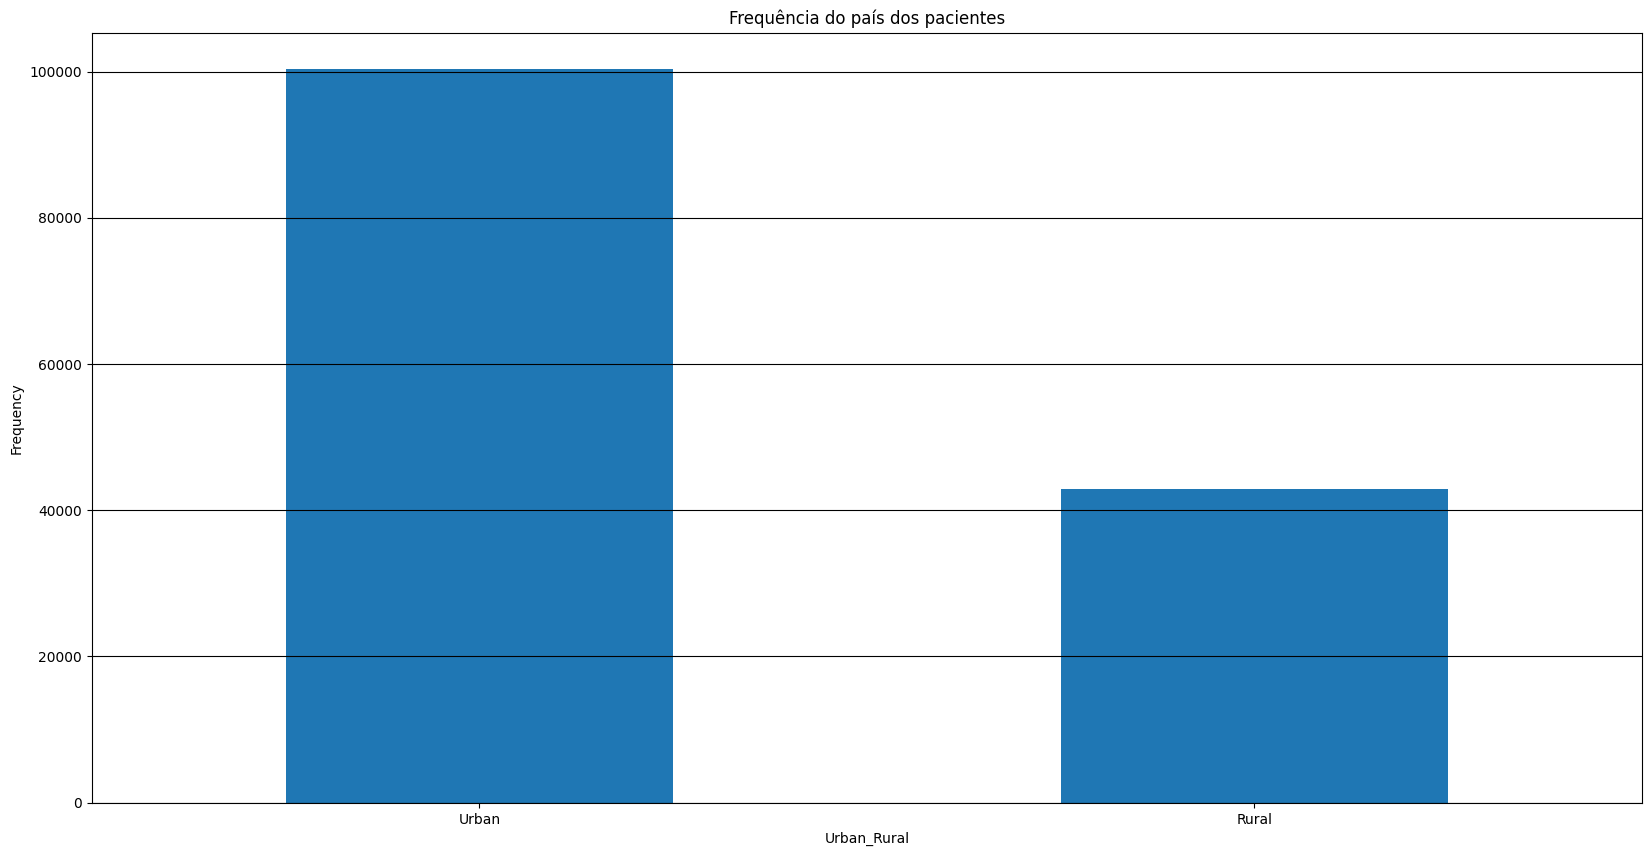

In [ ]:
# Gráfico da região dentre os entrevistados
plt.figure(figsize=(20, 10))
plt.title("Frequência da região dos pacientes")
plt.xlabel("Urban_Rural")
plt.ylabel("Frequency")
df['Urban_Rural'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
qtd_pais = df['Urban_Rural'].value_counts().reset_index(name='Frequency')
qtd_pais.columns = ['Urban_Rural', 'Frequency']
qtd_pais

,Urban_Rural,Frequency
0,Urban,100311
1,Rural,42883


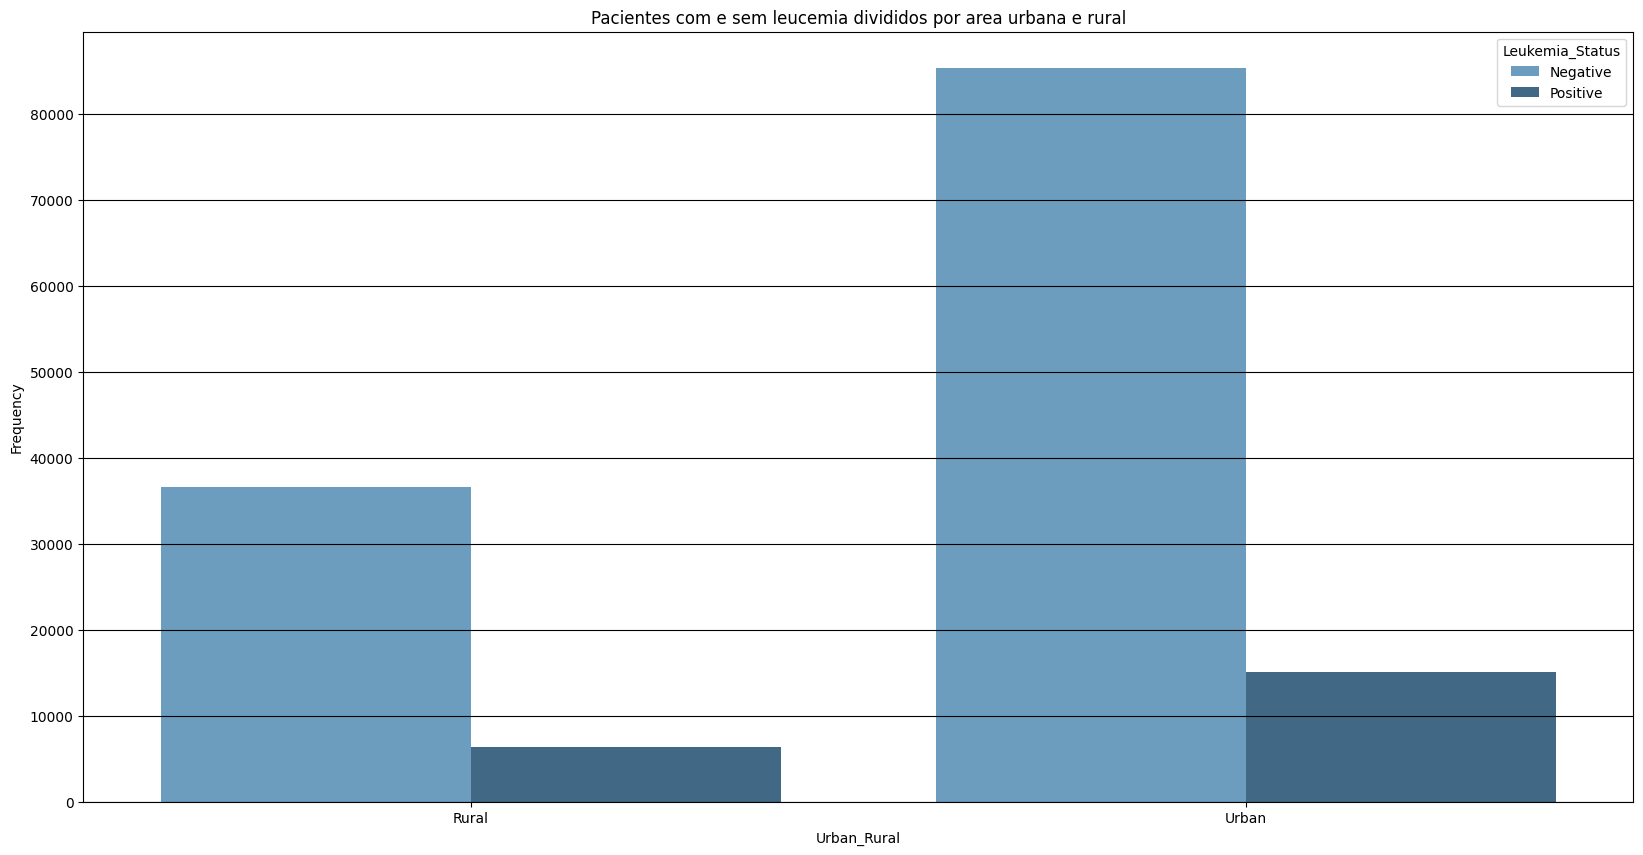

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Urban_Rural', hue='Leukemia_Status', data=df, palette='Blues_d')
plt.title('Pacientes com e sem leucemia divididos por area urbana e rural')
plt.xlabel('Urban_Rural')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
contagem = df.groupby(['Urban_Rural', 'Leukemia_Status']).size().reset_index(name='Frequency')
contagem

,Urban_Rural,Leukemia_Status,Frequency
0,Rural,Negative,36535
1,Rural,Positive,6348
2,Urban,Negative,85262
3,Urban,Positive,15049


# ML

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Pré-processamento
le = LabelEncoder()

categorical_columns = ['Gender', 'Genetic_Mutation', 'Family_History',
                       'Smoking_Status', 'Alcohol_Consumption', 'Infection_History',
                       'Chronic_Illness', 'Immune_Disorders', 'Ethnicity',
                       'Socioeconomic_Status', 'Country', 'Urban_Rural', 'Radiation_Exposure']

# Aplicando LabelEncoder para todas as colunas categóricas
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Definindo as variáveis X (features) e y (target)
X = df.drop(['Patient_ID', 'Leukemia_Status'], axis=1)  # Remover colunas desnecessárias
y = df['Leukemia_Status']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Árvore de Decisão

In [ ]:
# Treinando o modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prevendo e avaliando o modelo
y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))

Acurácia: 0.725723663535738


# Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))

Acurácia: 0.84947100108244


# **Normalizar os dados para os modelos:**

In [ ]:
# Normalizando os dados com StandardScaler
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=42, max_iter = 3000, solver='liblinear', C=0.1, tol=1e-5)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_train_scaled)
print('Acurácia:', accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.84947100108244
Acurácia média com validação cruzada: 0.850848937191742


# Redes Neurais

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
print('Acurácia:', accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.831942456091344
Acurácia média com validação cruzada: 0.850848937191742


# **Normalizar os dados para o modelo:**

In [ ]:
# Normalizando os dados com MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN)

In [ ]:
# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prevendo e avaliando o modelo
y_pred = knn.predict(X_test)

# Acurácia
print('Acurácia do KNN:', accuracy_score(y_test, y_pred))

Acurácia do KNN: 0.8323614651349558
